In [793]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
import random

In [794]:
df = pd.read_csv("covid_analytics_clinical_data.csv")
for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)
df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [795]:
sampled = df.sample(539)

[0.00938528 0.01140597 0.00331347 0.01000269 0.01015089 0.01311691
 0.00842177 0.0090165  0.00859641 0.00769745 0.0068538  0.00117101
 0.01050909 0.00358644 0.006797   0.00803206 0.00848109 0.00679784
 0.01110624 0.0015156  0.01670246 0.02031322 0.01532475 0.00754863
 0.00899313 0.00751079 0.01125054 0.01273915 0.01035141 0.00691233
 0.01471215 0.00922247 0.00365991 0.00872206 0.00418328 0.00346722
 0.00634781 0.00290019 0.00380964 0.00739216 0.00556398 0.00525263
 0.00158008 0.00288636 0.00165693 0.00137    0.00377584 0.00439284
 0.00414569 0.00391911 0.00642704 0.00181214 0.00310318 0.00356964
 0.01791478 0.01669337 0.01433481 0.01291133 0.00780026 0.00722308
 0.00718905 0.00539588 0.00767535 0.00710116 0.00756485 0.00298442
 0.00414426 0.00282169 0.00749308 0.00522333 0.00459849 0.00502809
 0.00420846 0.00569915 0.00119262 0.00630733 0.0040835  0.00227571
 0.00729713 0.00265529 0.00243466 0.00081549 0.00567528 0.0160062
 0.00476518 0.00691975 0.01462914 0.00652483 0.00338896 0.00459

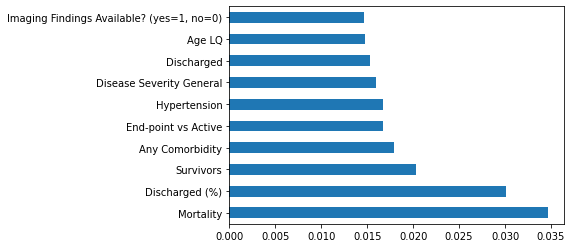

In [796]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [797]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])
new_df

array([[  2. ,  18. ,   0. ,   1. ,  45.2],
       [ 52. ,  47. ,   0. ,   1. ,  -1. ],
       [ 21. ,  31. ,   0. ,   1. ,  86. ],
       ...,
       [  1. ,   1. ,   1. ,   0. , 100. ],
       [  2. ,   2. ,   0. ,   0. ,  -1. ],
       [  2. ,   2. ,   0. ,   1. ,  -1. ]])

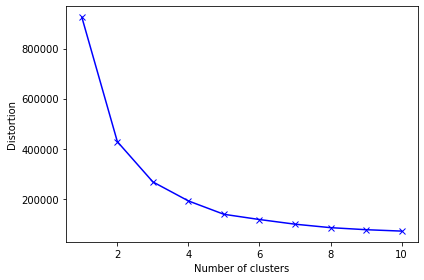

In [798]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [799]:
km = KMeans(4)

km.fit(new_df)


KMeans(n_clusters=4)

In [800]:
x = np.nan_to_num(new_df)

In [801]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)
pca_components

labels = km.labels_

In [802]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,24.772528,1.792515
1,-26.134852,42.690338
2,63.287206,25.164722
3,-20.797368,-7.954697
4,-20.523423,-9.432465


In [803]:
# sets the data for easily plotable dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,24.772528,1.792515,2
1,-26.134852,42.690338,3
2,63.287206,25.164722,1
3,-20.797368,-7.954697,0
4,-20.523423,-9.432465,0


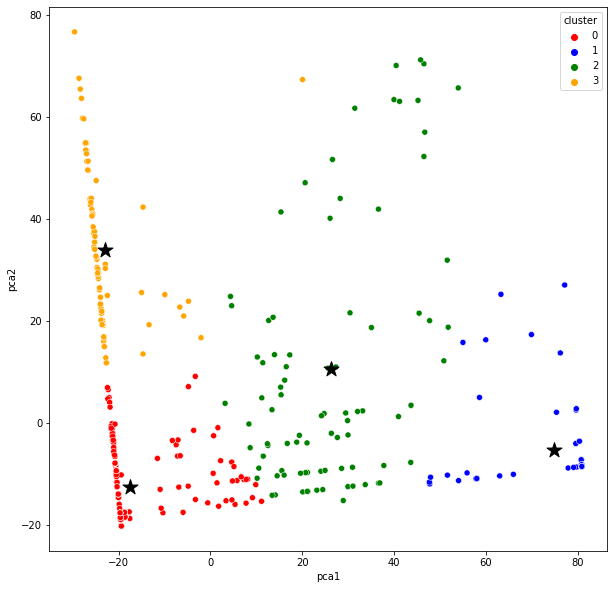

In [804]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green','orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [805]:
#10-fold validation
print("Percentage of positives")
sampled['y'].value_counts()/len(sampled)

Percentage of positives


KeyError: 'Y'

In [ ]:
#Set up data for train
x = new_df
y = np.array(sampled['y'])
y = y.astype('int')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [ ]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

In [ ]:
from sklearn.model_selection import cross_val_predict



predicted = cross_val_predict(clf, x, y, cv=cv)

predicted